# Figure 5: Probability distribution over time conditioned on non-extinction for the 3 mosquito model

## Abby Barlow, University of Bath
## Ben Adams, University of Bath

Importing required libraries

In [1]:
import numpy as np
import itertools
from scipy.linalg import expm
import pylab as plt
import matplotlib
import sympy as sp

Importing required scripts

In [2]:
import importlib
import Rate_transitions
import Finding_P_dist
import Finding_full_Q
import Hughes_model

get_transition = Rate_transitions.get_transition
Pget = Finding_P_dist.Pget
getQ = Finding_full_Q.getQ
F = Hughes_model.F

# scripts autosave, so no need to re-run code chunk after making changes
%load_ext autoreload
%autoreload 2

Finding the coexistence steady state

In [3]:
# defining parameters as symbols so can solve symbolically
b,nm,nw,u,v,phi,Q,d,dw = sp.symbols('b nm nw u v phi Q d dw')

zm = ((nm + (1-u)*nw)/(nm + nw))*(nm + (1-v)*phi*nw)
zw = v*phi*nw

eq1 = b*zm*(1-(nm + nw)/Q) - d*nm      # ODE for wild-types
eq2 = b*phi*v*(1-(nm + nw)/Q) - dw     # ODE for Wolbachia-infected, we have taken out a factor nw

sol_coexist = sp.solve([eq1,eq2],[nm,nw])   # solving symbolically

Parameter values

In [4]:
# set some parameter values 

K = 3            # reproductive carrying capacity
d1 = 12/100      # wild-type death rate
d2 = 12/100      # Wolbachia death rate
xstar = 2        # imposed steady state (for wild type population)
b1 = round(d1/F(xstar,K),2) # wild-type per capita birth rate
phi = 7/10       # Wolbachia fitness
b2 = b1*phi      # Wolbachia  per capita fitness
v = 10/10        # probability of vertical transmission


# create a dictionary to store all parameter values
params_dict = {'b1': b1,
              'b2': b2,
              'K': K,
              'd1': d1,
              'd2': d2,
              'v': v,
              'phi': phi}

In [5]:
# the second solution corresponds to the coexistence steady state
# substitute in parameter values to find explicit solution
nm_co = sol_coexist[1][0].subs({'b':b1,'u':1,'v':v,'phi':phi,'Q':K,'d':d1,'dw':d2}).evalf()
nw_co = sol_coexist[1][1].subs({'b':b1,'u':1,'v':v,'phi':phi,'Q':K,'d':d1,'dw':d2}).evalf()
print('coexistence steady state is',(nm_co,nw_co))
# so we have to approximate the coexistence SS with (1,1)

coexistence steady state is (1.10000000000000, 0.471428571428571)


Construct a dictionary of all the state variables

In [6]:
# construct a dictionary that associated an integer index with each possible states, states are stored as an np.array - easier to apply mathematical operations than tuple 
max_pop = 3   # maximum household size
state_dict = {index: np.array((i, j)) for index, (i, j) in enumerate([(i, j) for i in range(max_pop + 1) for j in range(max_pop + 1) if i + j <= max_pop])}
print(state_dict)

{0: array([0, 0]), 1: array([0, 1]), 2: array([0, 2]), 3: array([0, 3]), 4: array([1, 0]), 5: array([1, 1]), 6: array([1, 2]), 7: array([2, 0]), 8: array([2, 1]), 9: array([3, 0])}


Construct the full transition matrix

In [7]:
# construct a matrix Q for the transition rate q_ij betweeen states i and j
n_states = len(state_dict)    # total number of states

Q = getQ(state_dict,params_dict)
print(Q)

[[-0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.12  -0.288  0.168  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.24  -0.408  0.168  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.36  -0.36   0.     0.     0.     0.     0.     0.   ]
 [ 0.12   0.     0.     0.    -0.36   0.     0.     0.24   0.     0.   ]
 [ 0.     0.12   0.     0.     0.12  -0.444  0.084  0.     0.12   0.   ]
 [ 0.     0.     0.12   0.     0.     0.24  -0.36   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.24   0.     0.    -0.48   0.     0.24 ]
 [ 0.     0.     0.     0.     0.     0.24   0.     0.12  -0.36   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.36   0.    -0.36 ]]


Plotting the figure

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


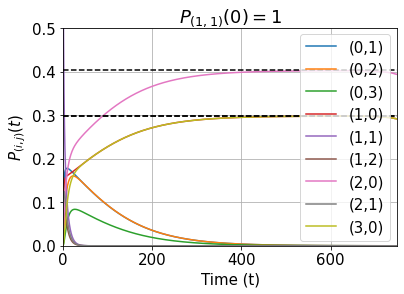

In [8]:
matplotlib.rcParams.update({'font.size': 15})   # font size

t_start = 0            # starting time point
t_range = 750          # ending time point
steps = t_range        # number of time points
initial_state = np.array((1,1))      # starting at the coexistence SS (approximately)

# returns the probability distribution of the household being in each state for each time point and the time points
P_vec,ts = Pget(t_start,t_range,Q,steps,initial_state,state_dict)

# plotting the probabilities of being in each labelled state *conditioning on non-extinction*
plt.plot(ts,P_vec[:,1]/(1-P_vec[:,0]), label='(0,1)') 
plt.plot(ts,P_vec[:,2]/(1-P_vec[:,0]), label='(0,2)')
plt.plot(ts,P_vec[:,3]/(1-P_vec[:,0]), label='(0,3)')
plt.plot(ts,P_vec[:,4]/(1-P_vec[:,0]), label='(1,0)')
plt.plot(ts,P_vec[:,5]/(1-P_vec[:,0]), label='(1,1)')
plt.plot(ts,P_vec[:,6]/(1-P_vec[:,0]), label='(1,2)')
plt.plot(ts,P_vec[:,7]/(1-P_vec[:,0]), label='(2,0)')
plt.plot(ts,P_vec[:,8]/(1-P_vec[:,0]), label='(2,1)')
plt.plot(ts,P_vec[:,9]/(1-P_vec[:,0]), label='(3,0)')

plt.xlabel('Time (t)')            # x label
plt.ylabel('$P_{(i,j)}(t)$')      # y label
plt.title('$P_{(1,1)}(0)=1$')     # title
plt.ylim(0,0.5)                   # y range
plt.xlim(0,750)                   # x range, alter this to achieve each subfigure
plt.grid()                        # adds grid
plt.legend(loc='right')           # adds legend

# plotting the steady state solutions
### see 'Figure_6' file
plt.axhline(0.298437880, color='black', linestyle='--')
plt.axhline(0.40312424, color='black', linestyle='--')
plt.axhline(0.29843788, color='black', linestyle='--')

plt.savefig('P_dist_cond_phi07.pdf' , bbox_inches='tight')  # save figure